In [1]:
import pandas as pd
import anndata as ad
from loguru import logger 
import time

import numpy as np
import tifffile

import matplotlib.pyplot as plt
import seaborn as sns

import shapely
import geopandas as gpd

import os
import sys
sys.path.append(os.path.abspath('../scripts'))
import utils
import importlib

import scimap as sm

Running SCIMAP  2.1.3


In [2]:
adata = ad.read_h5ad('../data/processed/20241004_1107_991_992_knn_RCN.h5ad')

In [3]:
adata.obs.columns

Index(['CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'filter_by_ann', 'mean_DAPI_bg_abs_above_value',
       'mean_DAPI_bg_abs_below_value', 'Area_filter_nottoobig',
       'Area_filter_nottoolow', 'Area_filter', 'DAPI_ratio',
       'DAPI_ratio_pass_nottoolow', 'DAPI_ratio_pass_nottoohigh',
       'DAPI_ratio_pass', 'imageid', 'phenotype', 'spatial_lda_knn7_kmeans_k7',
       'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7',
       'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7',
       'spatial_lda_knn50_kmeans_k7'],
      dtype='object')

In [4]:
adata.obs['imageid']

0          991
1          991
2          991
3          991
4          991
          ... 
1615228    992
1615229    992
1615230    992
1615231    992
1615232    992
Name: imageid, Length: 1615233, dtype: category
Categories (2, object): ['991', '992']

In [5]:
adata.obs['Biopsy_type'] = adata.obs['imageid'].map({'991':"Primary", '992':"Relapse"})

In [8]:
adata.obs.Biopsy_type.value_counts()

Biopsy_type
Relapse    1005051
Primary     610182
Name: count, dtype: int64

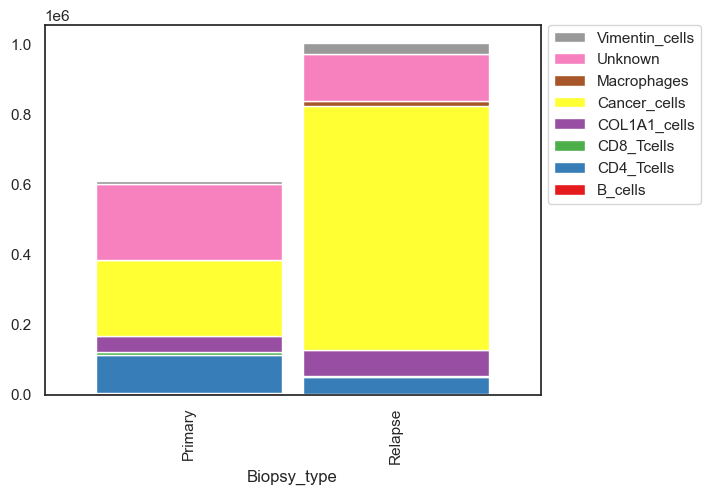

In [ ]:
sm.pl.stacked_barplot (adata,
                    x_axis='Biopsy_type',
                    y_axis='phenotype',
                    method='absolute',
                    )

In [10]:
?sm.pl.stacked_barplot

Signature:
sm.pl.stacked_barplot(
    adata,
    x_axis='imageid',
    y_axis='phenotype',
    subset_xaxis=None,
    subset_yaxis=None,
    order_xaxis=None,
    order_yaxis=None,
    method='percent',
    plot_tool='matplotlib',
    matplotlib_cmap=None,
    matplotlib_bbox_to_anchor=(1, 1.02),
    matplotlib_legend_loc=2,
    fileName='stacked_barplot.pdf',
    saveDir=None,
    return_data=False,
    **kwargs,
)
Docstring:
Parameters:
        adata (anndata.AnnData):
            The annotated data matrix.

        x_axis (str):
            Column in `adata.obs` to be used as x-axis categories.

        y_axis (str):
            Column in `adata.obs` representing categories to stack.

        subset_xaxis (list, optional):
            Subsets categories in x_axis before plotting.

        subset_yaxis (list, optional):
            Subsets categories in y_axis before plotting.

        order_xaxis (list, optional):
            Specifies custom ordering for x-axis categories.

       

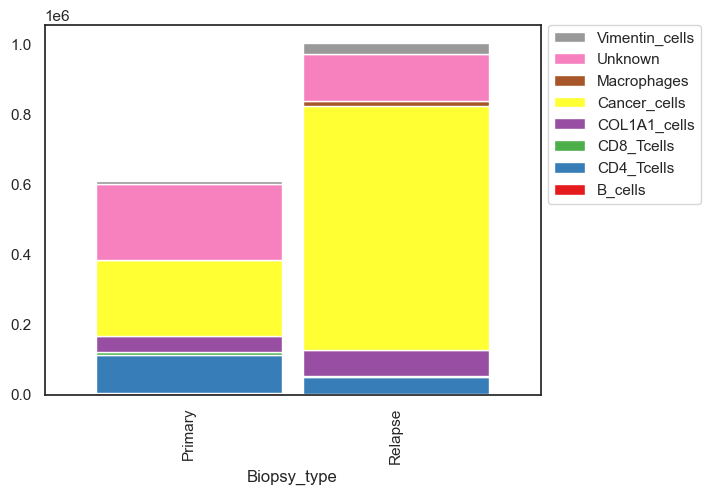

In [12]:
df_sbp_abs = sm.pl.stacked_barplot(adata, x_axis='Biopsy_type', y_axis='phenotype', method='absolute', return_data=True)

In [13]:
df_sbp_abs

phenotype    B_cells  CD4_Tcells  CD8_Tcells  COL1A1_cells  Cancer_cells  \
Biopsy_type                                                                
Primary         3578      109335        8826         45124        216397   
Relapse          388       50369        2034         75164        694938   

phenotype    Macrophages  Unknown  Vimentin_cells  
Biopsy_type                                        
Primary              921   218068            7933  
Relapse            14218   134974           32966

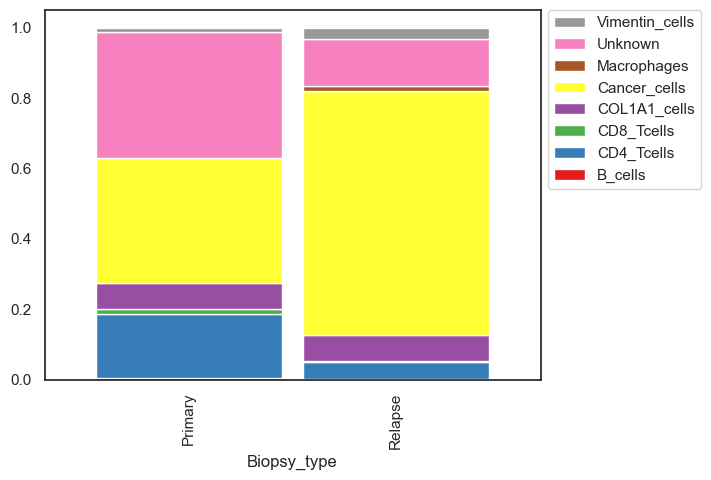

In [11]:
sm.pl.stacked_barplot (adata,
                    x_axis='Biopsy_type',
                    y_axis='phenotype',
                    method='percent',
                    )

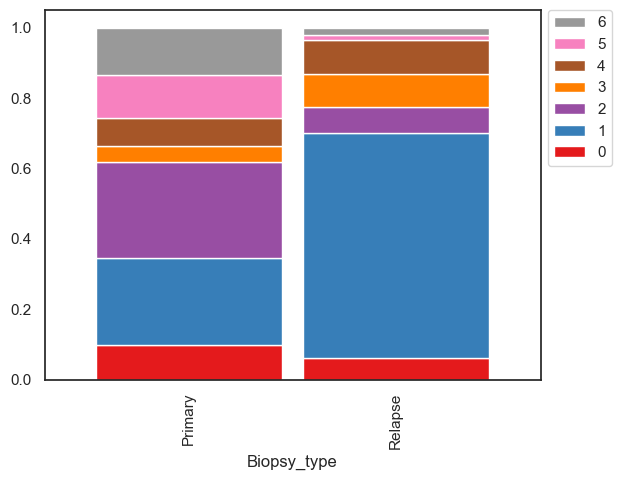

In [31]:
sm.pl.stacked_barplot (adata, x_axis='Biopsy_type', y_axis='spatial_lda_knn21_kmeans_k7',method='percent',)

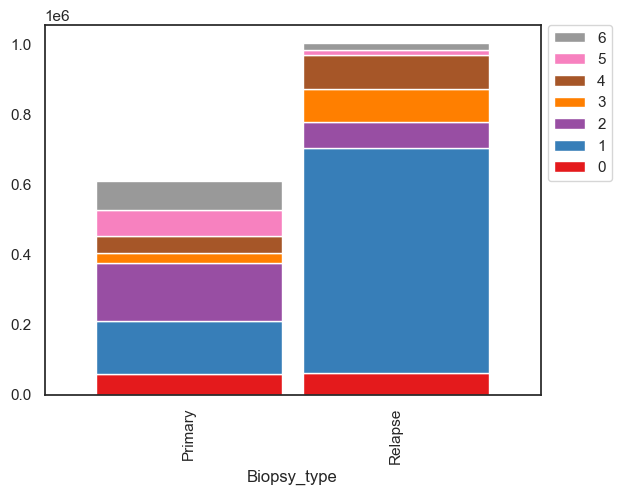

In [32]:
sm.pl.stacked_barplot (adata, x_axis='Biopsy_type', y_axis='spatial_lda_knn21_kmeans_k7',method='absolute',)

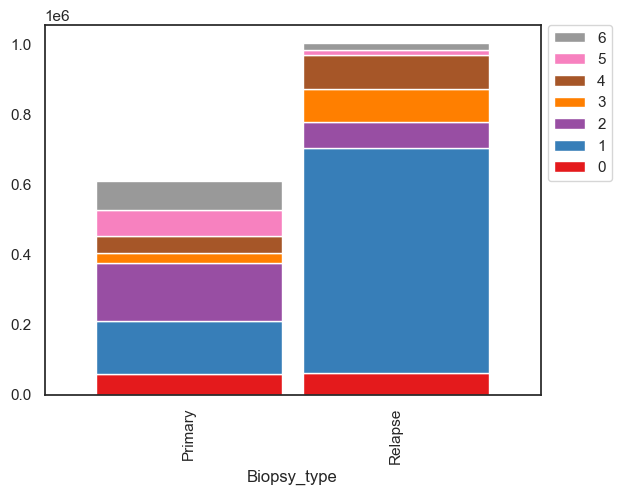

In [33]:
df_RCN = sm.pl.stacked_barplot (adata, x_axis='Biopsy_type', y_axis='spatial_lda_knn21_kmeans_k7',method='absolute', return_data=True)

In [34]:
df_RCN

spatial_lda_knn21_kmeans_k7      0       1       2      3      4      5      6
Biopsy_type                                                                   
Primary                      59798  150657  166628  27883  48299  74085  82832
Relapse                      61759  642658   73095  96392  96850  12627  21670

In [12]:
custom_colours = {
        "Cancer_cells" : "red",
        "CD4_Tcells" : "peru",
        "CD8_Tcells" : "lawngreen",
        "Macrophages" : "yellow",
        "COL1A1_cells" : "deepskyblue",
        "Vimentin_cells" : "orange",
        "B_cells" : "black",
        "Unknown" : "whitesmoke"
    }

In [27]:
sm.pl.stacked_barplot (adata,
                       x_axis='imageid',
                       y_axis='phenotype',
                       method='percent',
                       plot_tool='plotly',
                       color_discrete_map=custom_colours)

In [31]:
# Let's plot the composition of these neighbourhoods
sm.pl.stacked_barplot (adata, 
                    x_axis='spatial_lda_knn30_kmeans_k7', 
                    y_axis='phenotype',
                    plot_tool='plotly',
                    color_discrete_map=custom_colours)

In [37]:
adata.obs.imageid.value_counts()

imageid
992    1005051
991     610182
Name: count, dtype: int64

In [6]:
adata.obs.imageid.value_counts()

imageid
992    1005051
991     610182
Name: count, dtype: int64

In [7]:
adata.obs.imageid.unique()

['991', '992']
Categories (2, object): ['991', '992']

In [16]:
adata.obs.columns

Index(['CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'filter_by_ann', 'mean_DAPI_bg_abs_above_value',
       'mean_DAPI_bg_abs_below_value', 'Area_filter_nottoobig',
       'Area_filter_nottoolow', 'Area_filter', 'DAPI_ratio',
       'DAPI_ratio_pass_nottoolow', 'DAPI_ratio_pass_nottoohigh',
       'DAPI_ratio_pass', 'imageid', 'phenotype', 'spatial_lda_knn7_kmeans_k7',
       'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7',
       'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7',
       'spatial_lda_knn50_kmeans_k7'],
      dtype='object')

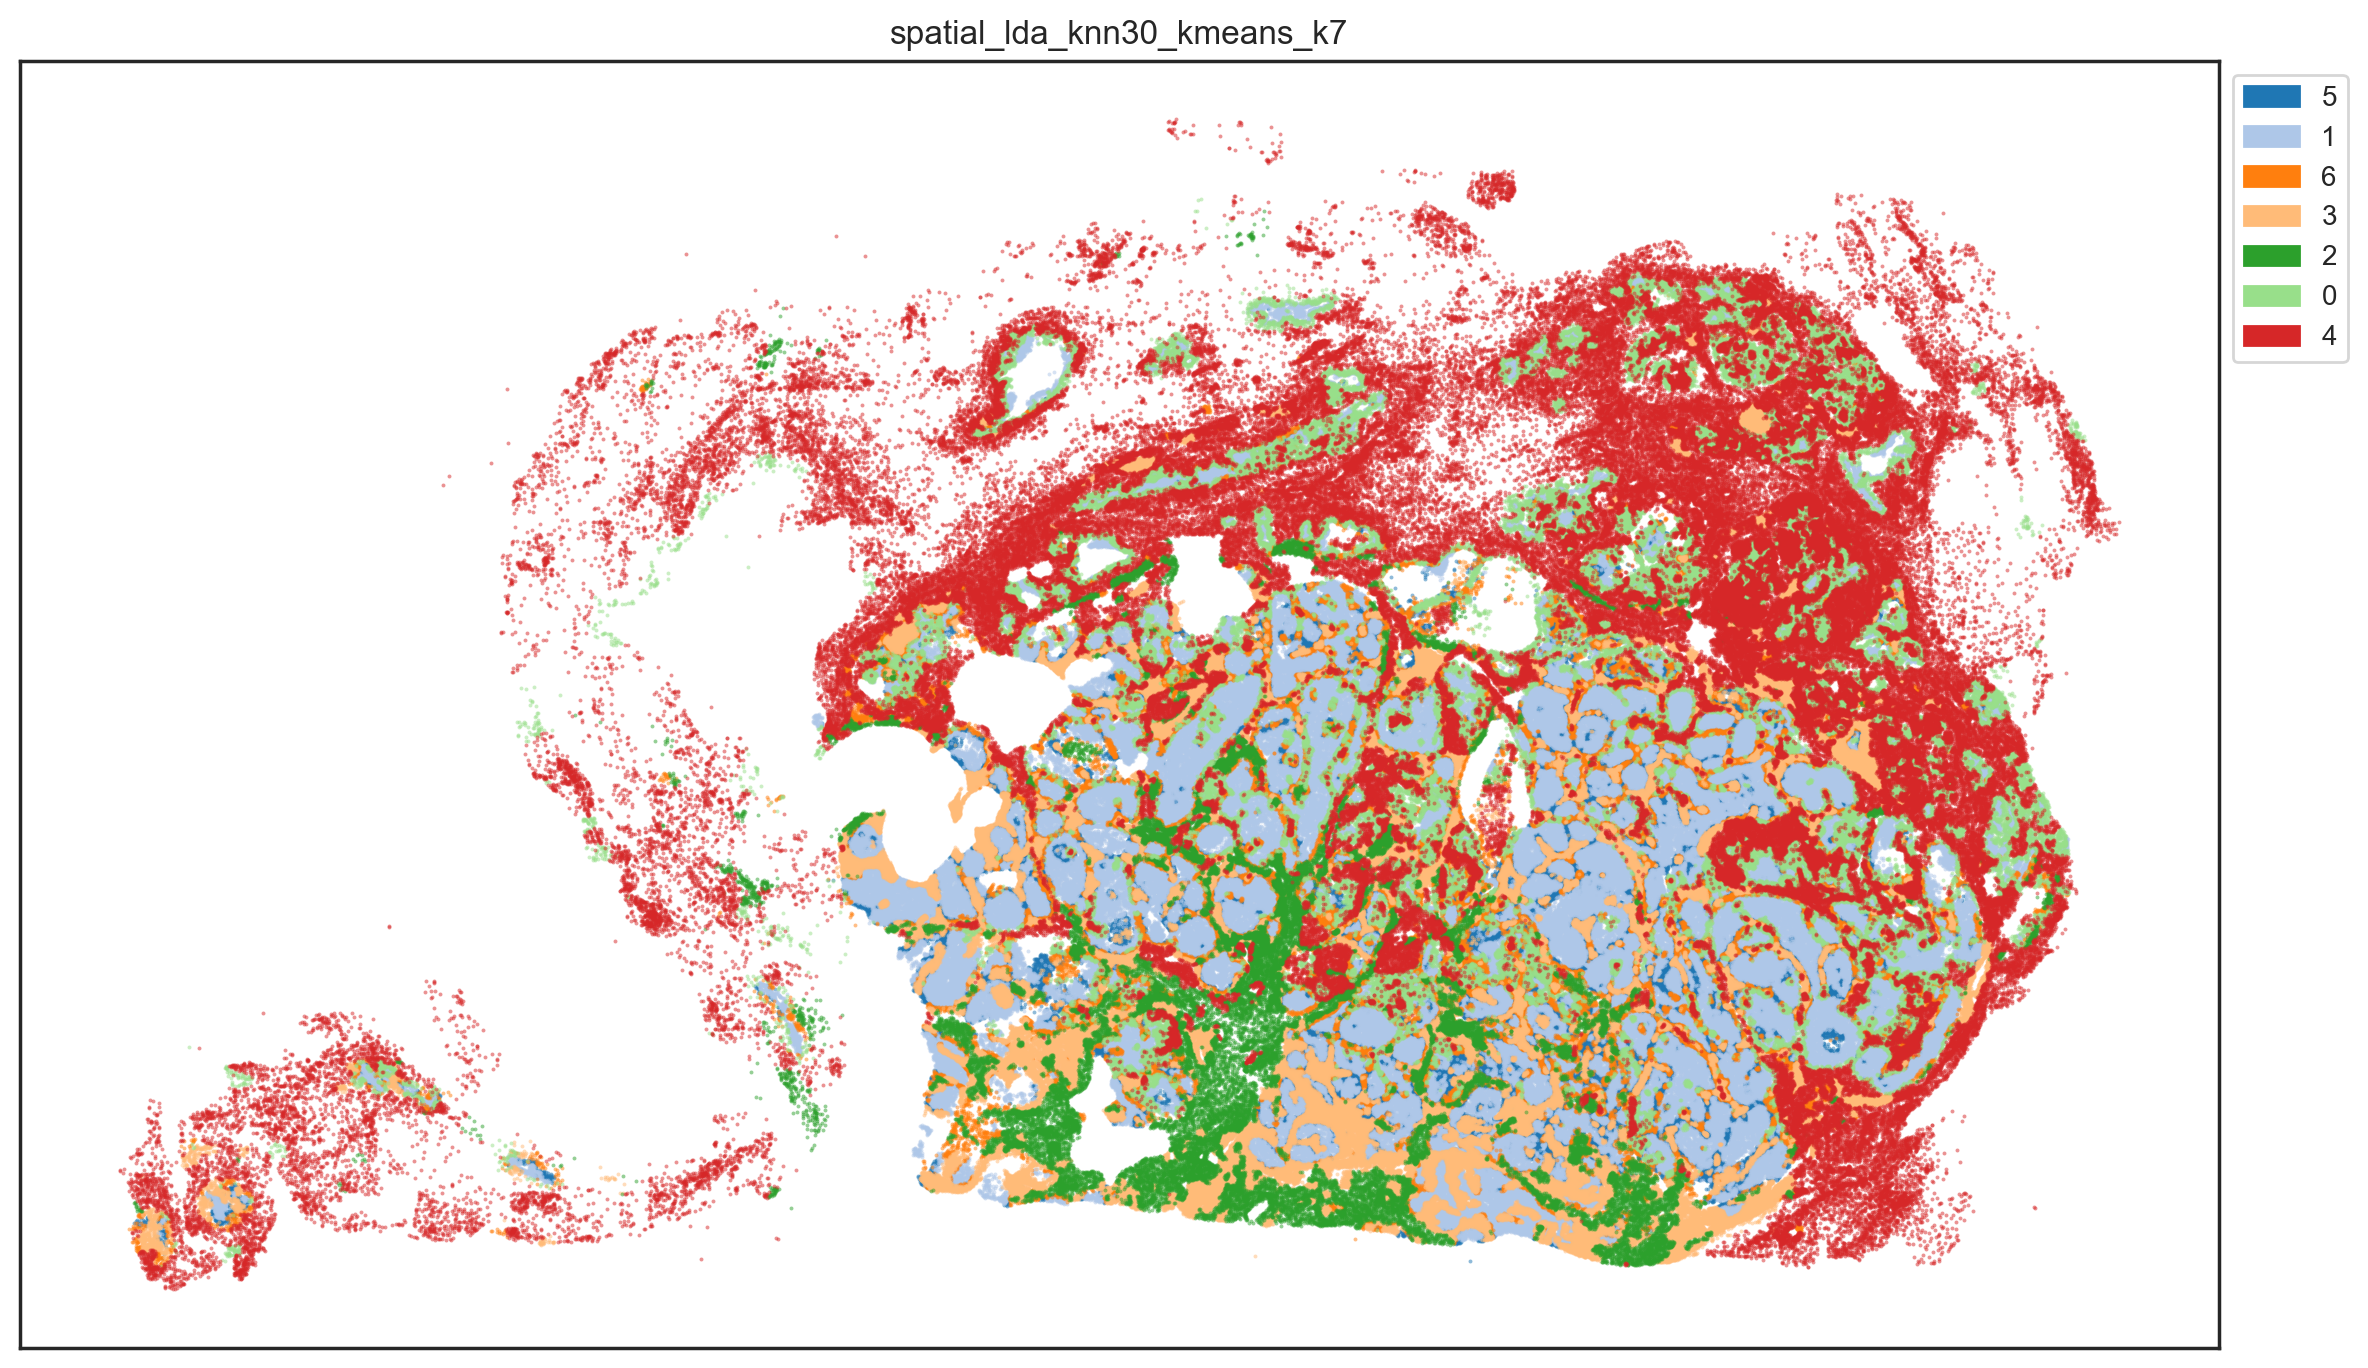

In [18]:
sm.pl.spatial_scatterPlot(adata,
                        imageid='imageid',
                        subset="991",
                        colorBy = ['spatial_lda_knn30_kmeans_k7'],
                        figsize=(12,7), 
                        s=2,
                        alpha=0.5,
                        fontsize=10)

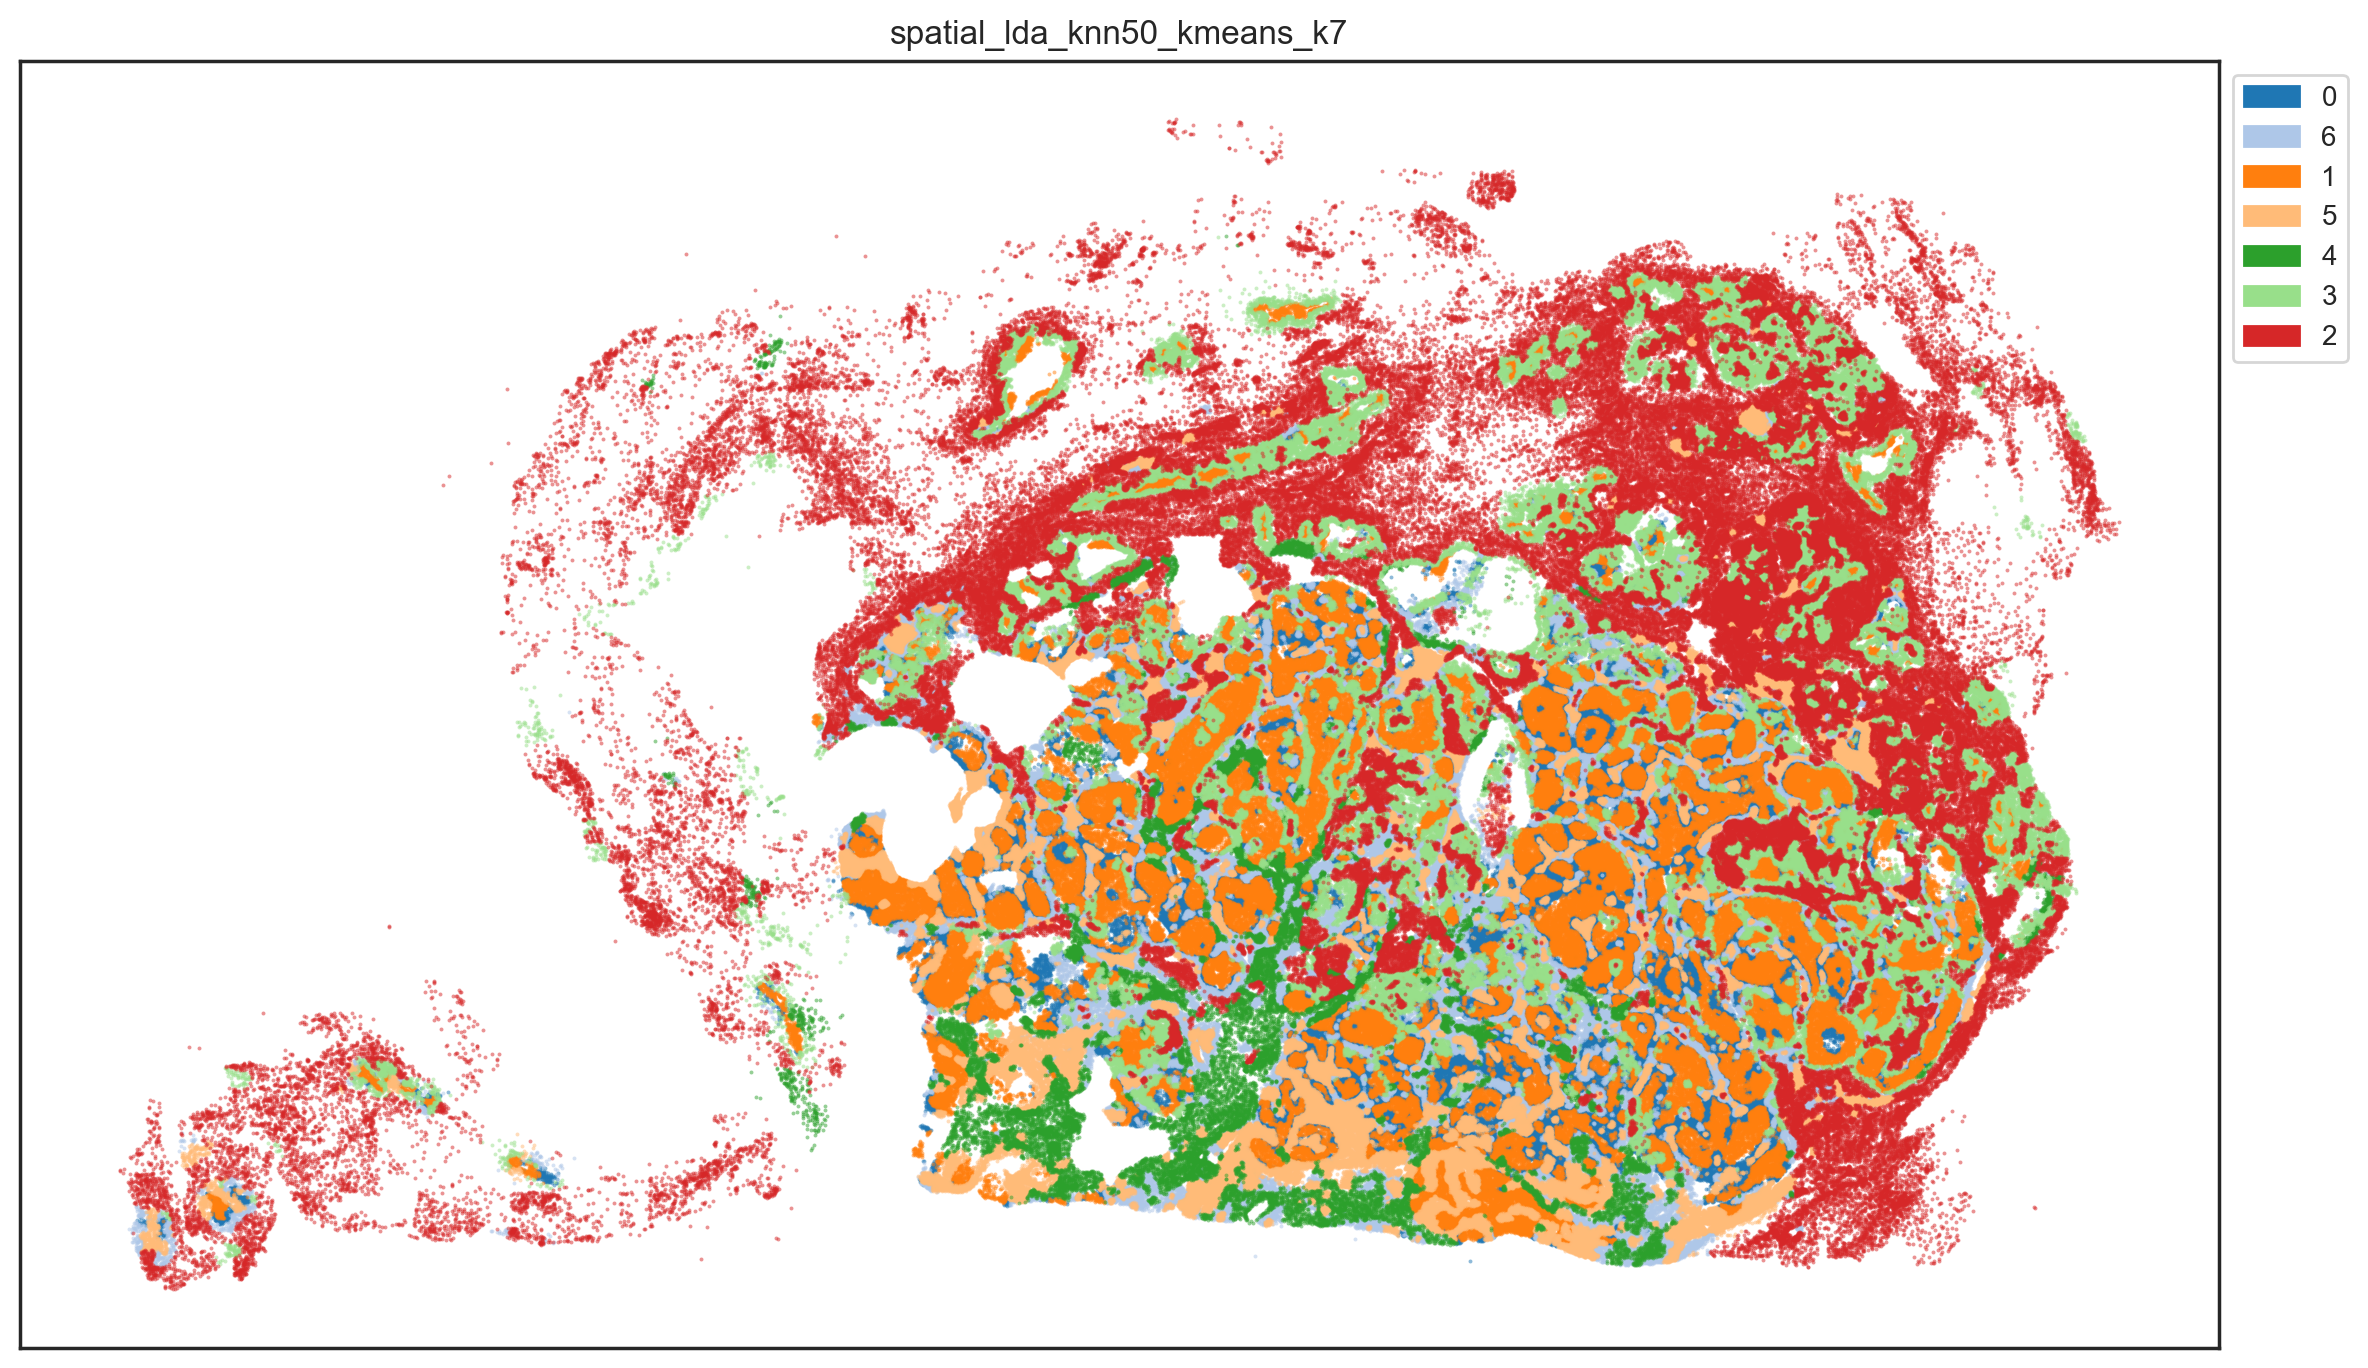

In [19]:
sm.pl.spatial_scatterPlot(adata,
                        imageid='imageid',
                        subset="991",
                        colorBy = ['spatial_lda_knn50_kmeans_k7'],
                        figsize=(12,7), 
                        s=2,
                        alpha=0.5,
                        fontsize=10)

# Count cell per neighborhood per slide

In [27]:
adata.obs.columns

Index(['CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'filter_by_ann', 'mean_DAPI_bg_abs_above_value',
       'mean_DAPI_bg_abs_below_value', 'Area_filter_nottoobig',
       'Area_filter_nottoolow', 'Area_filter', 'DAPI_ratio',
       'DAPI_ratio_pass_nottoolow', 'DAPI_ratio_pass_nottoohigh',
       'DAPI_ratio_pass', 'imageid', 'phenotype', 'spatial_lda_knn7_kmeans_k7',
       'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7',
       'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7',
       'spatial_lda_knn50_kmeans_k7', 'Biopsy_type'],
      dtype='object')

In [28]:
df = adata.obs.copy()
df = df.groupby(['Biopsy_type', 'phenotype', 'spatial_lda_knn21_kmeans_k7']).size()

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_11187/559269647.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [29]:
df

Biopsy_type  phenotype       spatial_lda_knn21_kmeans_k7
Primary      B_cells         0                                 28
                             1                                 12
                             2                                397
                             3                                 12
                             4                                 24
                                                            ...  
Relapse      Vimentin_cells  2                               1812
                             3                              25459
                             4                                749
                             5                               1616
                             6                                252
Length: 112, dtype: int64